In [23]:
import numpy as np
from skimage import io, feature, segmentation, filters, color, morphology
import matplotlib.pyplot as plt
from read_roi import read_roi_file


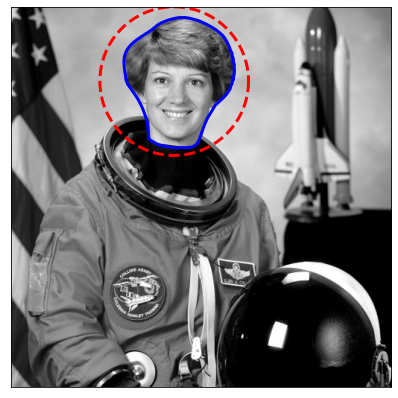

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


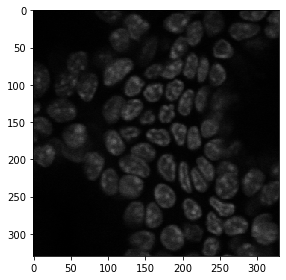

In [7]:
stack = io.imread(
    '/Users/dobrik4ever/Library/CloudStorage/OneDrive-Personal/Documents/Study/winter_21-22/Master Thesis/4 Raw data/17H-1.tif'
)

img = stack[100]
io.imshow(img)

(0.0, 330.0, 330.0, 0.0)

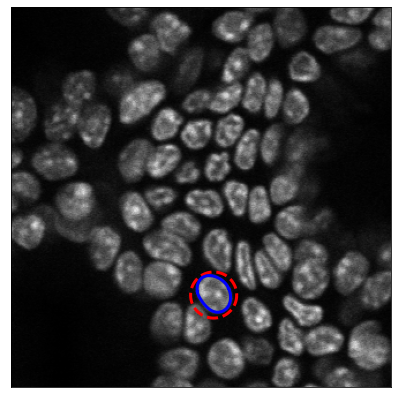

In [22]:
s = np.linspace(0, 2*np.pi, 400)
x, y = 176, 250
R = 20
r = y + R*np.sin(s)
c = x + R*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])


In [33]:
roi = read_roi_file('test_z100(17H-1).roi')
X = roi['test_z100(17H-1)']['x']
Y = roi['test_z100(17H-1)']['y']

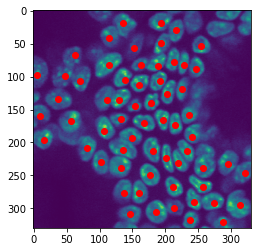

In [35]:
plt.imshow(img)
plt.scatter(X, Y, c='r')

(0.0, 330.0, 330.0, 0.0)

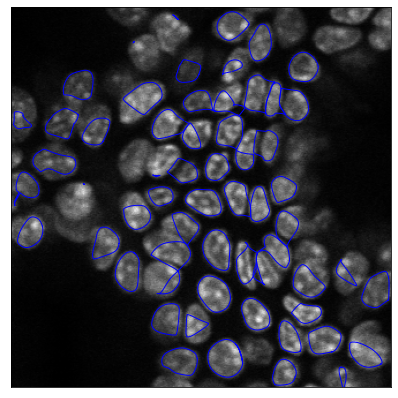

In [57]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)

s = np.linspace(0, 2*np.pi, 400)

for x, y in zip(X, Y):
    R = 10
    r = y + R*np.sin(s)
    c = x + R*np.cos(s)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(img, 3, preserve_range=False),
                        init, alpha=0.01
                        )#alpha=0.015, beta=10, gamma=0.001, w_line=_)

    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=1)
    # ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])